In [59]:
import matplotlib.pyplot as plt
import numpy as np

In [60]:
class BasicPolinomial:
    def __init__(self, totalDegree, minx = -1.0, maxx = 1.0, points = 1000, miny = -1, maxy = 1):
        self.totalDegree = totalDegree
        self.x = np.linspace(minx, maxx, points)
        self.miny = miny
        self.maxy = maxy

    def evaluate(self, degree) -> np.ndarray:
        if degree == 0:
            return np.ones(len(self.x))
        return np.power(self.x, degree)
    
    def plot(self):
        plt.figure()
        for i in range(self.totalDegree):
            plt.plot(x, self.evaluate(i))
        plt.ylim(self.miny, self.maxy)

In [65]:
class BasicGaussian:
    def __init__(self, totalDegree, minx = -1.0, maxx = 1.0, points = 1000, miny = 0, maxy = 1):
        self.totalDegree = totalDegree
        self.s = 1.0/totalDegree
        self.lenPerSegment = int(self.s * points)
        self.x = np.linspace(minx, maxx, points)
        self.points = points
        self.miny = miny
        self.maxy = maxy
    
    def _getSegmentMean(self, degree) -> np.ndarray:
        startSegment = self.lenPerSegment * (degree - 1)
        endSegment = min(self.lenPerSegment * degree, len(self.x))
        segment = self.x[startSegment:endSegment]
        return np.mean(segment)
    
    def evaluate(self, degree) -> np.ndarray:
        if degree == 0:
            return np.ones(len(self.x))

        mean = self._getSegmentMean(degree)
        return np.exp(-np.power(x - mean, 2)/(2*self.s*self.s))
    
    def plot(self):
        plt.figure()
        for i in range(self.totalDegree):
            plt.plot(x, self.evaluate(i))
        plt.ylim(self.miny, self.maxy)

In [84]:
class BasicSigmoidal:
    def __init__(self, totalDegree, minx = -1.0, maxx = 1.0, points = 1000, miny = 0, maxy = 1):
        self.totalDegree = totalDegree
        self.s = 1.0/totalDegree
        self.lenPerSegment = int(self.s * points)
        self.x = np.linspace(minx, maxx, points)
        self.points = points
        self.miny = miny
        self.maxy = maxy

    def _sigmoid(self, a) -> np.ndarray:
        return 1.0/(1.0 + np.exp(-a))
    
    def _getSegmentMean(self, degree) -> np.ndarray:
        startSegment = self.lenPerSegment * (degree - 1)
        endSegment = min(self.lenPerSegment * degree, len(self.x))
        segment = self.x[startSegment:endSegment]
        return np.mean(segment)
    
    def evaluate(self, degree) -> np.ndarray:
        if degree == 0:
            return np.ones(len(self.x))
        
        mean = self._getSegmentMean(degree)
        aSigmoid = (self.x - mean)/self.s
        return self._sigmoid(aSigmoid)
    
    def plot(self):
        plt.figure()
        for i in range(self.totalDegree):
            plt.plot(x, self.evaluate(i))
        plt.ylim(self.miny, self.maxy)

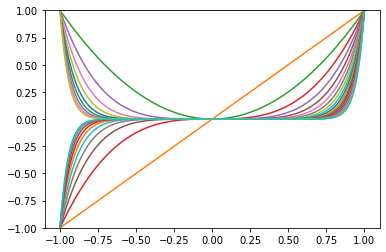

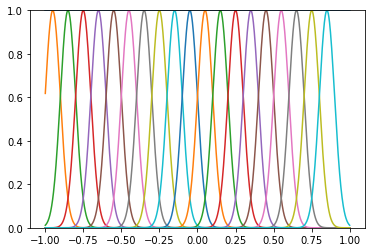

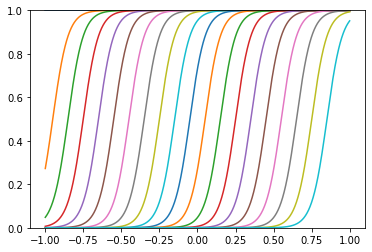

In [85]:
def plotBasicFunction(func, numOfDegree):
    func(numOfDegree).plot()

plotBasicFunction(BasicPolinomial, 20)
plotBasicFunction(BasicGaussian, 20)
plotBasicFunction(BasicSigmoidal, 20)